# Part I - Bike Rental
## by Nam Vu Hoang

## Introduction
> Introduce the dataset

This data set is fetched from https://www.lyft.com/bikes/bay-wheels/system-data. This data set is about Bike Rental sharing from January to September of 2024

Each trip includes:

Bike ID

Bike Type

Start Time and Date

End Time and Date

Start Station ID

Start Station Name

Start Station Latitude

Start Station Longitude

End Station ID

End Station Name

End Station Latitude

End Station Longitude

User Type





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
bike_rental_1 = pd.read_csv('202401-baywheels-tripdata.csv')
bike_rental_2 = pd.read_csv('202402-baywheels-tripdata.csv')
bike_rental_3 = pd.read_csv('202403-baywheels-tripdata.csv')
bike_rental_4 = pd.read_csv('202404-baywheels-tripdata.csv')
bike_rental_5 = pd.read_csv('202405-baywheels-tripdata.csv')
bike_rental_6 = pd.read_csv('202406-baywheels-tripdata.csv')
bike_rental_7 = pd.read_csv('202407-baywheels-tripdata.csv')
bike_rental_8 = pd.read_csv('202408-baywheels-tripdata.csv')
bike_rental_9 = pd.read_csv('202409-baywheels-tripdata.csv')


In [4]:
bike_rental_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CC1B49543825D43C,classic_bike,2024-01-10 17:51:51,2024-01-10 17:57:03,Adeline St at 40th St,EM-D4,Genoa St at 55th St,OK-D2,37.831277,-122.278267,37.839649,-122.271756,member
1,DAD85B04AC2FE762,electric_bike,2024-01-18 17:16:16,2024-01-18 17:25:23,Valencia St at 16th St,SF-M22-2,29th St at Church St,SF-T20,37.765303,-122.421842,37.743684,-122.426806,member
2,DFC8F18E5862DA0C,electric_bike,2024-01-10 17:05:41,2024-01-10 17:20:03,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Brannan St at 7th St,SF-K27-2,37.791315,-122.398834,37.772438,-122.403924,member
3,C431CBFB24AD4C1D,classic_bike,2024-01-27 13:50:50,2024-01-27 14:00:26,Beale St at Harrison St,SF-G30-1,Brannan St at 7th St,SF-K27-2,37.787963,-122.391808,37.772438,-122.403924,casual
4,11963D1C987A38FA,electric_bike,2024-01-28 15:27:55,2024-01-28 15:48:06,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Greenwich St at Franklin St,SF-B21,37.791385,-122.398798,37.800287,-122.425786,casual


This data frame has 13 features. To work with bike rental duration we can work with start_at and end_at features to calculate the time duration in seconds. 

#### Concatenate all dataframes into one dataframe

In [5]:
bike_rental = pd.concat([bike_rental_1, bike_rental_2, bike_rental_3, bike_rental_4, bike_rental_5, bike_rental_6, bike_rental_7, bike_rental_8, bike_rental_9], ignore_index=True)

In [6]:
bike_rental.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CC1B49543825D43C,classic_bike,2024-01-10 17:51:51,2024-01-10 17:57:03,Adeline St at 40th St,EM-D4,Genoa St at 55th St,OK-D2,37.831277,-122.278267,37.839649,-122.271756,member
1,DAD85B04AC2FE762,electric_bike,2024-01-18 17:16:16,2024-01-18 17:25:23,Valencia St at 16th St,SF-M22-2,29th St at Church St,SF-T20,37.765303,-122.421842,37.743684,-122.426806,member
2,DFC8F18E5862DA0C,electric_bike,2024-01-10 17:05:41,2024-01-10 17:20:03,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Brannan St at 7th St,SF-K27-2,37.791315,-122.398834,37.772438,-122.403924,member
3,C431CBFB24AD4C1D,classic_bike,2024-01-27 13:50:50,2024-01-27 14:00:26,Beale St at Harrison St,SF-G30-1,Brannan St at 7th St,SF-K27-2,37.787963,-122.391808,37.772438,-122.403924,casual
4,11963D1C987A38FA,electric_bike,2024-01-28 15:27:55,2024-01-28 15:48:06,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Greenwich St at Franklin St,SF-B21,37.791385,-122.398798,37.800287,-122.425786,casual


In [7]:
print(bike_rental.shape)
print(bike_rental.dtypes)

(2494958, 13)
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


In [8]:
#Check if ther are duplicates
print("Duplicated Rows: " + str(bike_rental.duplicated().sum()))

Duplicated Rows: 0


In [9]:
# Drop NULL values
bike_rental.dropna(inplace=True)

In [10]:
bike_rental.reset_index(drop=True, inplace=True)
bike_rental.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CC1B49543825D43C,classic_bike,2024-01-10 17:51:51,2024-01-10 17:57:03,Adeline St at 40th St,EM-D4,Genoa St at 55th St,OK-D2,37.831277,-122.278267,37.839649,-122.271756,member
1,DAD85B04AC2FE762,electric_bike,2024-01-18 17:16:16,2024-01-18 17:25:23,Valencia St at 16th St,SF-M22-2,29th St at Church St,SF-T20,37.765303,-122.421842,37.743684,-122.426806,member
2,DFC8F18E5862DA0C,electric_bike,2024-01-10 17:05:41,2024-01-10 17:20:03,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Brannan St at 7th St,SF-K27-2,37.791315,-122.398834,37.772438,-122.403924,member
3,C431CBFB24AD4C1D,classic_bike,2024-01-27 13:50:50,2024-01-27 14:00:26,Beale St at Harrison St,SF-G30-1,Brannan St at 7th St,SF-K27-2,37.787963,-122.391808,37.772438,-122.403924,casual
4,11963D1C987A38FA,electric_bike,2024-01-28 15:27:55,2024-01-28 15:48:06,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Greenwich St at Franklin St,SF-B21,37.791385,-122.398798,37.800287,-122.425786,casual


#### Change Data Type
I'll change the date type properly to analyze well

rideable_type: object -> CategoricalDType

started_at: object -> datatime

ended_at: object -> datatime

member_casual: object -> CategoricalDtype




In [11]:
# Change the data type of the started_at and ended_at columns to datetime
# Adjusted custom function to handle datetime conversion with variability in milliseconds
def convert_datetime(date_str):
    for format in ("%Y-%m-%d %H:%M:%S.%f", "%Y-%m-%d %H:%M:%S"):
        try:
            return pd.to_datetime(date_str, format=format)
        except ValueError:
            pass
    raise ValueError(f"Unable to convert date with given formats: {date_str}")

# Apply the custom function to each element of the 'date_column'
bike_rental['started_at'] = bike_rental['started_at'].apply(convert_datetime)
bike_rental['ended_at'] = bike_rental['ended_at'].apply(convert_datetime)

# Change rideable_type and member_casual to category
bike_rental['rideable_type'] = bike_rental['rideable_type'].astype('category')
bike_rental['member_casual'] = bike_rental['member_casual'].astype('category')


In [12]:
# Now use started_at and ended_at columns to calculate the duration of the ride in seconds
bike_rental['duration'] = (bike_rental['ended_at'] - bike_rental['started_at']).dt.total_seconds()

# Drop all rows with duration less than or equal to 0 and greater than 10000 seconds
bike_rental = bike_rental[(bike_rental['duration'] > 0) & (bike_rental['duration'] <= 3000)]

bike_rental.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,CC1B49543825D43C,classic_bike,2024-01-10 17:51:51,2024-01-10 17:57:03,Adeline St at 40th St,EM-D4,Genoa St at 55th St,OK-D2,37.831277,-122.278267,37.839649,-122.271756,member,312.0
1,DAD85B04AC2FE762,electric_bike,2024-01-18 17:16:16,2024-01-18 17:25:23,Valencia St at 16th St,SF-M22-2,29th St at Church St,SF-T20,37.765303,-122.421842,37.743684,-122.426806,member,547.0
2,DFC8F18E5862DA0C,electric_bike,2024-01-10 17:05:41,2024-01-10 17:20:03,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Brannan St at 7th St,SF-K27-2,37.791315,-122.398834,37.772438,-122.403924,member,862.0
3,C431CBFB24AD4C1D,classic_bike,2024-01-27 13:50:50,2024-01-27 14:00:26,Beale St at Harrison St,SF-G30-1,Brannan St at 7th St,SF-K27-2,37.787963,-122.391808,37.772438,-122.403924,casual,576.0
4,11963D1C987A38FA,electric_bike,2024-01-28 15:27:55,2024-01-28 15:48:06,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Greenwich St at Franklin St,SF-B21,37.791385,-122.398798,37.800287,-122.425786,casual,1211.0


In [13]:
print(bike_rental.shape)
print(bike_rental.dtypes)

(2198244, 14)
ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
duration                     float64
dtype: object


### What is the structure of your dataset?

> This data set has over 2.2M rows x 14 columns

### What is/are the main feature(s) of interest in your dataset?

> The main focus is on the duration in seconds because it is highly related with rental fees

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think start and end hour, month, rideable_type, member_casual are the related features.

### duration histogram

Duration is the most important feature because it is highly related to the rental fee. We can begin with looking into the distribution of the main variable of duration

In [14]:
bike_rental['duration'].describe()

count    2.198244e+06
mean     6.641664e+02
std      4.878373e+02
min      2.130000e-01
25%      3.255548e+02
50%      5.409815e+02
75%      8.557170e+02
max      3.000000e+03
Name: duration, dtype: float64

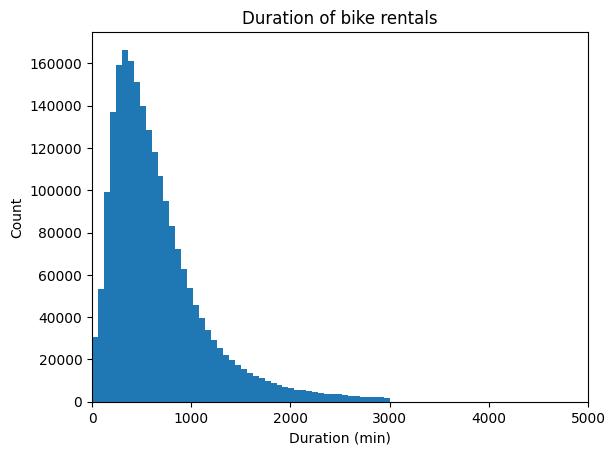

In [15]:
# Plot histogram of duration_min
base_color = sns.color_palette()[0]
plt.hist(data = bike_rental, x = 'duration', bins = 50)
plt.xlim(0, 5000)
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Duration of bike rentals')
plt.show()

There are many people who choose to ride about 400-500 seconds. This graph is higly right skewed so it is better to apply log transform

### Log transformation of duration histogram

In [16]:
np.log10(bike_rental['duration'].describe())

count    6.342076
mean     2.822277
std      2.688275
min     -0.671620
25%      2.512624
50%      2.733182
75%      2.932330
max      3.477121
Name: duration, dtype: float64

Text(0, 0.5, 'Count')

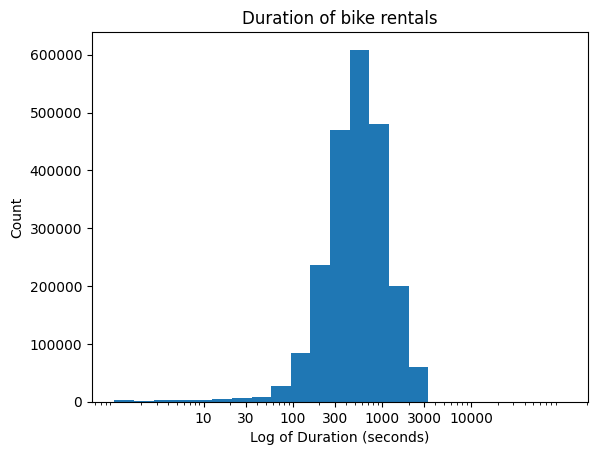

In [17]:
#Plot historgram of duration in log scale
log_duration_bins = 10 ** np.arange(0, 5.0+0.1, 0.22)
ticks = [10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = bike_rental, x = 'duration', bins = log_duration_bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Duration of bike rentals')
plt.xlabel('Log of Duration (seconds)')
plt.ylabel('Count')

### Countplot of rideable type

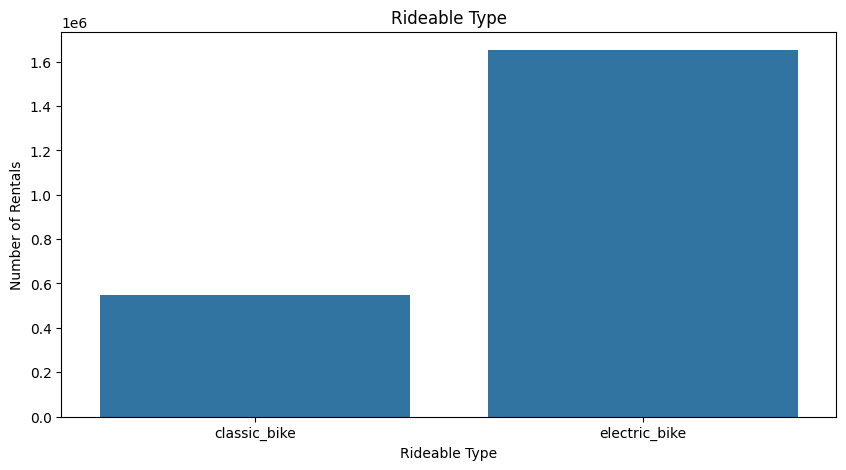

In [18]:
# Using seaborn to create a count plot of rideable type
plt.figure(figsize=[10, 5])
sns.countplot(data=bike_rental, x='rideable_type', color=base_color)
plt.title('Rideable Type')
plt.ylabel('Number of Rentals')
plt.xlabel('Rideable Type')
plt.show()


Electric bikes are rented about three times more than classic bikes

### Countplot of start station ID
Get top 10 of starting station

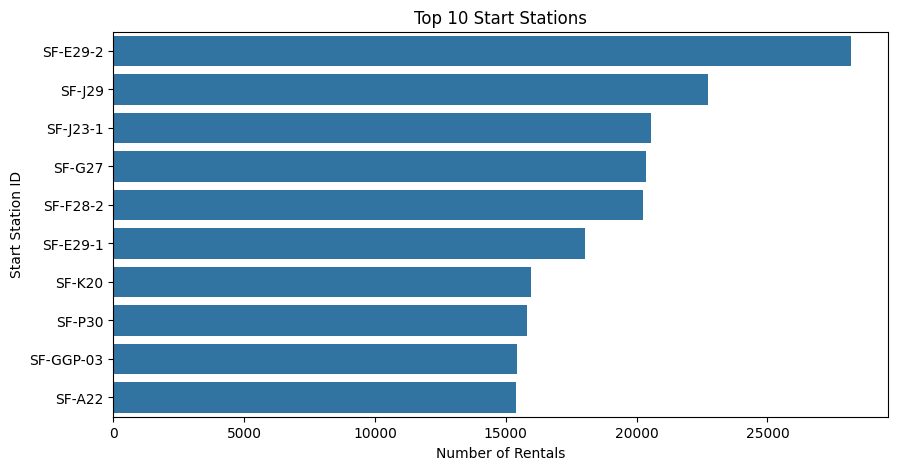

In [19]:
# Using seaborn to create a count plot of start station ID and only get the top 10
plt.figure(figsize=[10, 5])
sns.countplot(data=bike_rental, y='start_station_id', order=bike_rental['start_station_id'].value_counts().index[:10], color=base_color)
plt.title('Top 10 Start Stations')
plt.xlabel('Number of Rentals')
plt.ylabel('Start Station ID')
plt.show()

### Countplot of end station ID
Get top 10 of ending station

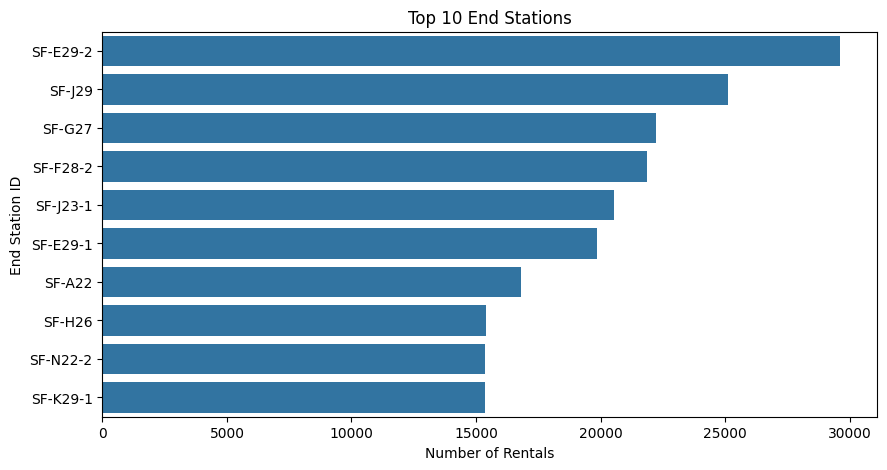

In [20]:
# Using seaborn to create a count plot of start station ID and only get the top 10
plt.figure(figsize=[10, 5])
sns.countplot(data=bike_rental, y='end_station_id', order=bike_rental['end_station_id'].value_counts().index[:10], color=base_color)
plt.title('Top 10 End Stations')
plt.xlabel('Number of Rentals')
plt.ylabel('End Station ID')
plt.show()

### Countplot of member_casual

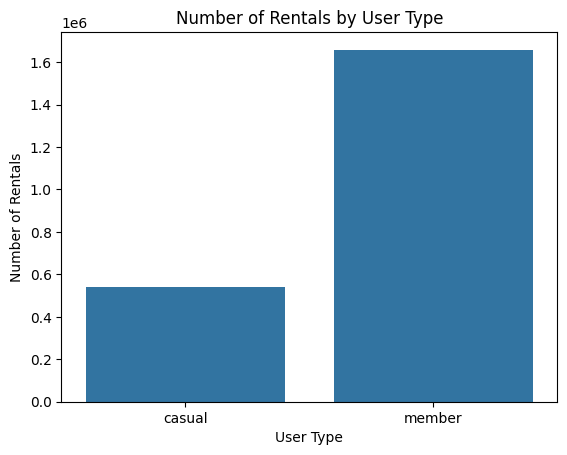

In [21]:
# Using seaborn to create a count plot of member_casual column
sns.countplot(data=bike_rental, x='member_casual', color=base_color)
plt.title('Number of Rentals by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rentals')
plt.show()


Most rental are from member, almost three times more than casual ones

### Histogram of start time (Hour)

In [22]:
# Extract start hour from started_at column
bike_rental['start_hour'] = bike_rental['started_at'].dt.hour
bike_rental.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_hour
0,CC1B49543825D43C,classic_bike,2024-01-10 17:51:51,2024-01-10 17:57:03,Adeline St at 40th St,EM-D4,Genoa St at 55th St,OK-D2,37.831277,-122.278267,37.839649,-122.271756,member,312.0,17
1,DAD85B04AC2FE762,electric_bike,2024-01-18 17:16:16,2024-01-18 17:25:23,Valencia St at 16th St,SF-M22-2,29th St at Church St,SF-T20,37.765303,-122.421842,37.743684,-122.426806,member,547.0,17
2,DFC8F18E5862DA0C,electric_bike,2024-01-10 17:05:41,2024-01-10 17:20:03,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Brannan St at 7th St,SF-K27-2,37.791315,-122.398834,37.772438,-122.403924,member,862.0,17
3,C431CBFB24AD4C1D,classic_bike,2024-01-27 13:50:50,2024-01-27 14:00:26,Beale St at Harrison St,SF-G30-1,Brannan St at 7th St,SF-K27-2,37.787963,-122.391808,37.772438,-122.403924,casual,576.0,13
4,11963D1C987A38FA,electric_bike,2024-01-28 15:27:55,2024-01-28 15:48:06,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Greenwich St at Franklin St,SF-B21,37.791385,-122.398798,37.800287,-122.425786,casual,1211.0,15


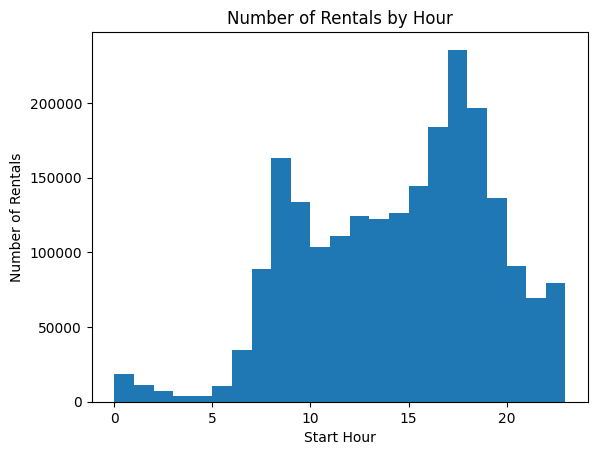

In [23]:
hour_bins = np.arange(0, 23+1, 1)
plt.hist(data=bike_rental, x='start_hour', bins=hour_bins, color=base_color)
plt.xlabel('Start Hour')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Hour')
plt.show()


Lots of people ride bikes from 8:00 to 9:00 and from 17:00 to 19:00 (morning and evening)

### Histogram of end time (Hour)

In [24]:
# Extract end hour from started_at column
bike_rental['end_hour'] = bike_rental['ended_at'].dt.hour
bike_rental.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_hour,end_hour
0,CC1B49543825D43C,classic_bike,2024-01-10 17:51:51,2024-01-10 17:57:03,Adeline St at 40th St,EM-D4,Genoa St at 55th St,OK-D2,37.831277,-122.278267,37.839649,-122.271756,member,312.0,17,17
1,DAD85B04AC2FE762,electric_bike,2024-01-18 17:16:16,2024-01-18 17:25:23,Valencia St at 16th St,SF-M22-2,29th St at Church St,SF-T20,37.765303,-122.421842,37.743684,-122.426806,member,547.0,17,17
2,DFC8F18E5862DA0C,electric_bike,2024-01-10 17:05:41,2024-01-10 17:20:03,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Brannan St at 7th St,SF-K27-2,37.791315,-122.398834,37.772438,-122.403924,member,862.0,17,17
3,C431CBFB24AD4C1D,classic_bike,2024-01-27 13:50:50,2024-01-27 14:00:26,Beale St at Harrison St,SF-G30-1,Brannan St at 7th St,SF-K27-2,37.787963,-122.391808,37.772438,-122.403924,casual,576.0,13,14
4,11963D1C987A38FA,electric_bike,2024-01-28 15:27:55,2024-01-28 15:48:06,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Greenwich St at Franklin St,SF-B21,37.791385,-122.398798,37.800287,-122.425786,casual,1211.0,15,15


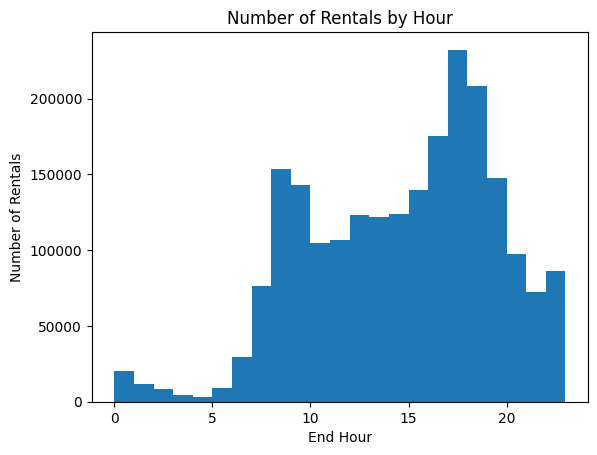

In [25]:
hour_bins = np.arange(0, 23+1, 1)
plt.hist(data=bike_rental, x='end_hour', bins=hour_bins, color=base_color)
plt.xlabel('End Hour')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Hour')
plt.show()


Lots of people ends riding bikes from 8:00 to 9:00 and from 17:00 to 19:00 (morning and evening)


### Histogram of month

In [26]:
# Extract month from started_at column
bike_rental['month'] = bike_rental['started_at'].dt.month
bike_rental.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_hour,end_hour,month
0,CC1B49543825D43C,classic_bike,2024-01-10 17:51:51,2024-01-10 17:57:03,Adeline St at 40th St,EM-D4,Genoa St at 55th St,OK-D2,37.831277,-122.278267,37.839649,-122.271756,member,312.0,17,17,1
1,DAD85B04AC2FE762,electric_bike,2024-01-18 17:16:16,2024-01-18 17:25:23,Valencia St at 16th St,SF-M22-2,29th St at Church St,SF-T20,37.765303,-122.421842,37.743684,-122.426806,member,547.0,17,17,1
2,DFC8F18E5862DA0C,electric_bike,2024-01-10 17:05:41,2024-01-10 17:20:03,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Brannan St at 7th St,SF-K27-2,37.791315,-122.398834,37.772438,-122.403924,member,862.0,17,17,1
3,C431CBFB24AD4C1D,classic_bike,2024-01-27 13:50:50,2024-01-27 14:00:26,Beale St at Harrison St,SF-G30-1,Brannan St at 7th St,SF-K27-2,37.787963,-122.391808,37.772438,-122.403924,casual,576.0,13,14,1
4,11963D1C987A38FA,electric_bike,2024-01-28 15:27:55,2024-01-28 15:48:06,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Greenwich St at Franklin St,SF-B21,37.791385,-122.398798,37.800287,-122.425786,casual,1211.0,15,15,1


In [27]:
bike_rental.month.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

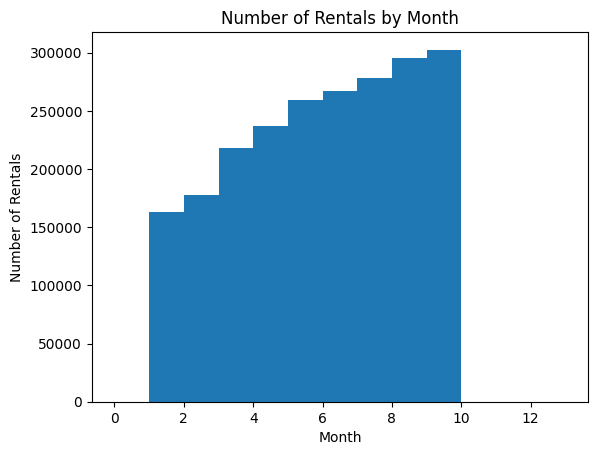

In [28]:
hour_bins = np.arange(0, 13+1, 1)
plt.hist(data=bike_rental, x='month', bins=hour_bins, color=base_color)
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Month')
plt.show()


From January to September, the number of rental bikes are increasing continuously

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [29]:
numeric_vars = ['duration', 'start_hour', 'end_hour', 'month']
categoric_vars = ['rideable_type', 'member_casual']

Text(0.5, 1.0, 'Rideable Type vs Duration')

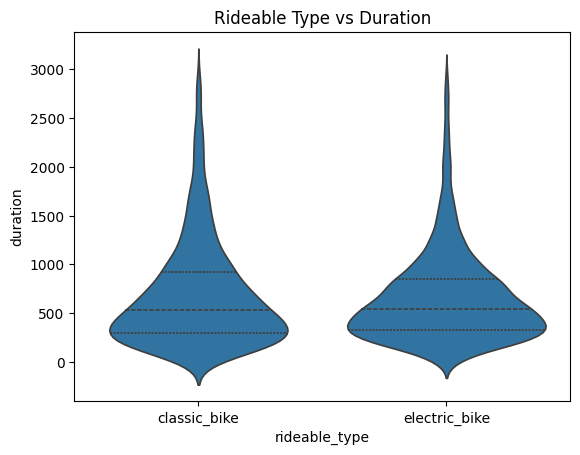

In [33]:
sns.violinplot(data=bike_samples, x='rideable_type', y='duration', color=base_color, inner='quartile')
plt.title('Rideable Type vs Duration')

Electric bikes are riden a bit longer than classic bikes

Text(0.5, 1.0, 'User Type vs Duration')

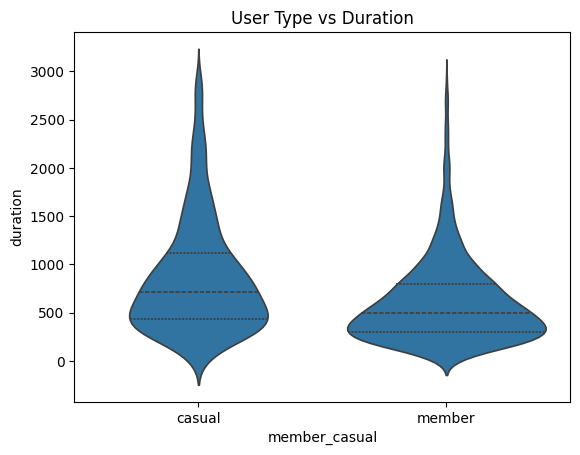

In [34]:
sns.violinplot(data=bike_samples, x='member_casual', y='duration', color=base_color, inner='quartile')
plt.title('User Type vs Duration')


Casual users ride longer than members.

Let's look into relationship between the categorical features

Text(0.5, 1.0, 'User Type vs Rideable Type')

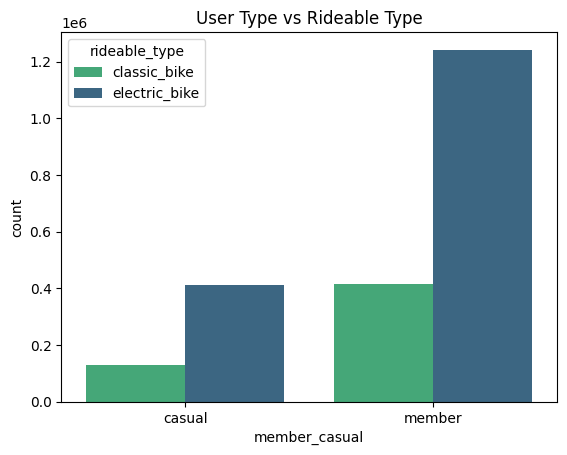

In [35]:
sns.countplot(data=bike_rental, x='member_casual', hue='rideable_type', palette='viridis_r')   
plt.title('User Type vs Rideable Type')


Generally, casual users are fewer than members. And in both two groups, they like to rent electric bikes more than classic bikes

### Heatmap for duration vs Start hour

Text(0.5, 1.0, 'Start Hour vs Duration')

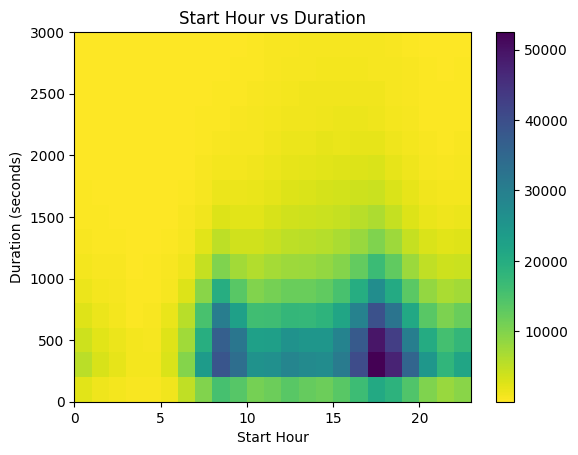

In [36]:
hour_bins_x = np.arange(0, bike_rental.start_hour.max()+1, 1)
hour_bins_y = np.arange(0, bike_rental.duration.max()+200, 200)
plt.hist2d(data=bike_rental, x='start_hour', y='duration', bins=[hour_bins_x, hour_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Start Hour')
plt.ylabel('Duration (seconds)')
plt.title('Start Hour vs Duration')


There are extremely many members who start riding bikes at 8 in the morning and 17:00 in the afternoon for about 300-500 seconds

### Heatmap between end_hour and duration

Text(0.5, 1.0, 'End Hour vs Duration')

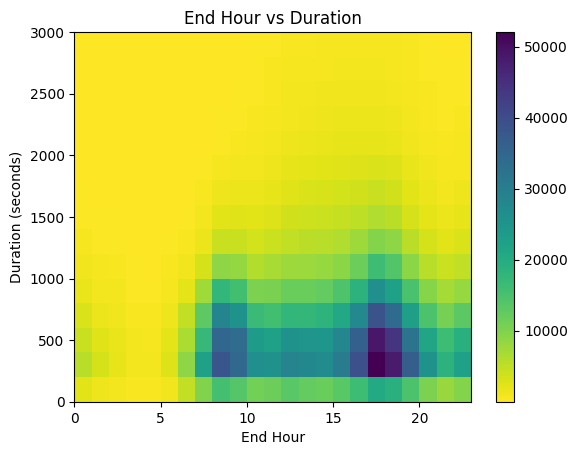

In [37]:
hour_bins_x = np.arange(0, bike_rental.end_hour.max()+1, 1)
hour_bins_y = np.arange(0, bike_rental.duration.max()+200, 200)
plt.hist2d(data=bike_rental, x='end_hour', y='duration', bins=[hour_bins_x, hour_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('End Hour')
plt.ylabel('Duration (seconds)')
plt.title('End Hour vs Duration')

There are extremely many members who end riding bikes at 8 in the morning and 17:00 in the afternoon for about 300-500 seconds

### Heatmap between duration and month

Text(0.5, 1.0, 'Month vs Duration')

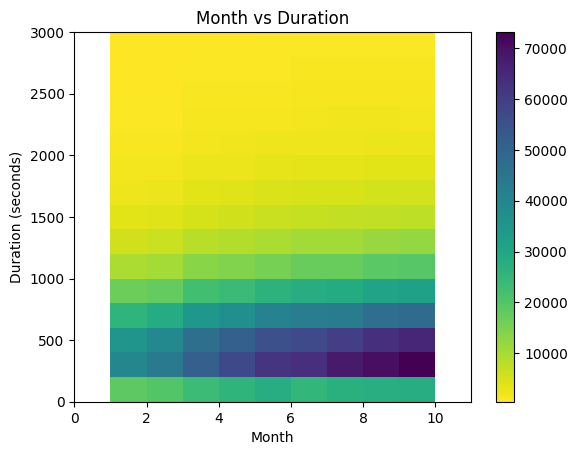

In [38]:
month_bins_x = np.arange(0, bike_rental.month.max()+3, 1)
month_bins_y = np.arange(0, bike_rental.duration.max()+200, 200)
plt.hist2d(data=bike_rental, x='month', y='duration', bins=[month_bins_x, month_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Month')
plt.ylabel('Duration (seconds)')
plt.title('Month vs Duration')

As expected, there are extreme many members who ride bikes from July to September

### Heatmap between member_casual and rideable_type

/var/folders/3v/k1rs64xd24g6bh07p7b127dc0000gn/T/ipykernel_56188/1779232261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_counts = bike_rental.groupby(['member_casual', 'rideable_type']).size()


Text(0.5, 1.0, 'User Type vs Rideable Type')

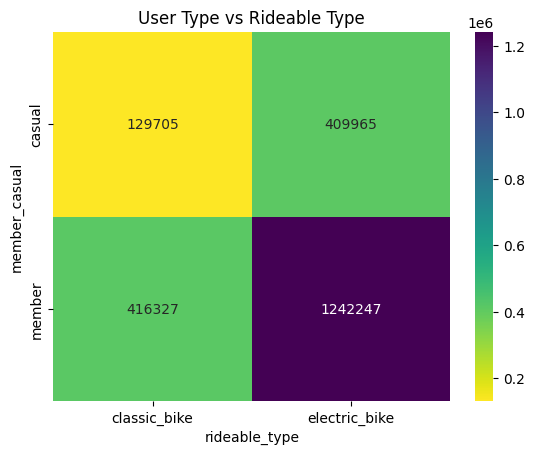

In [39]:
type_counts = bike_rental.groupby(['member_casual', 'rideable_type']).size()
type_counts = type_counts.reset_index(name='count')
type_counts = type_counts.pivot(index='member_casual', columns='rideable_type', values='count')
sns.heatmap(type_counts, annot=True, fmt='d', cmap='viridis_r')
plt.title('User Type vs Rideable Type')

In casual group, most people rents electric bikes (more than 3 times) while in member group, most people rents electric bikes (also more than 3 times)

### Duration, start_hour and casual_member

Text(0, 0.5, 'Duration (seconds)')

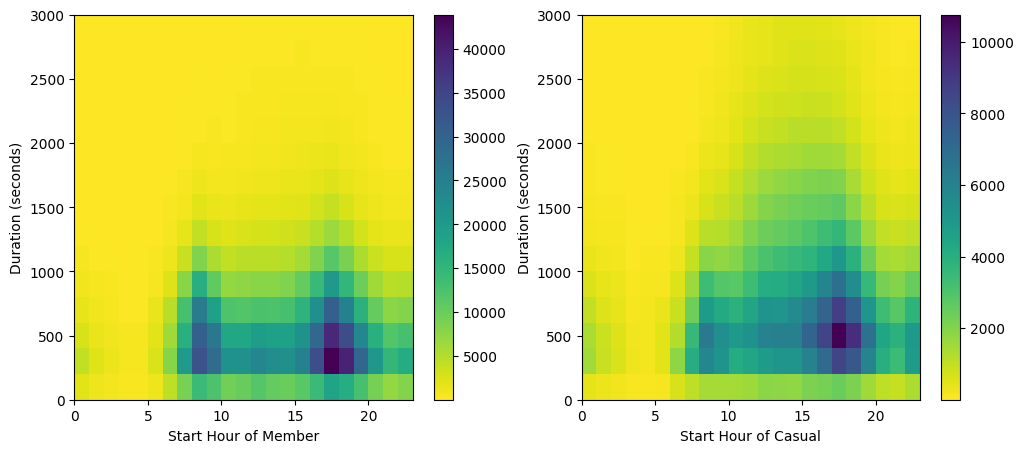

In [40]:
#Create heatmap for each casual or member user type
bike_rental_member = bike_rental[bike_rental['member_casual'] == 'member']
bike_rental_casual = bike_rental[bike_rental['member_casual'] == 'casual']

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
plt.hist2d(data=bike_rental_member, x='start_hour', y='duration', bins=[hour_bins_x, hour_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Start Hour of Member') 
plt.ylabel('Duration (seconds)')

plt.subplot(1, 2, 2)
plt.hist2d(data=bike_rental_casual, x='start_hour', y='duration', bins=[hour_bins_x, hour_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Start Hour of Casual')
plt.ylabel('Duration (seconds)')


Casual users ride bikes more regularly at around 8 and 17 than Members. However, the range of start hours in Casual users is longer than members.

### Duration, month and casual_member

Text(0, 0.5, 'Duration (seconds)')

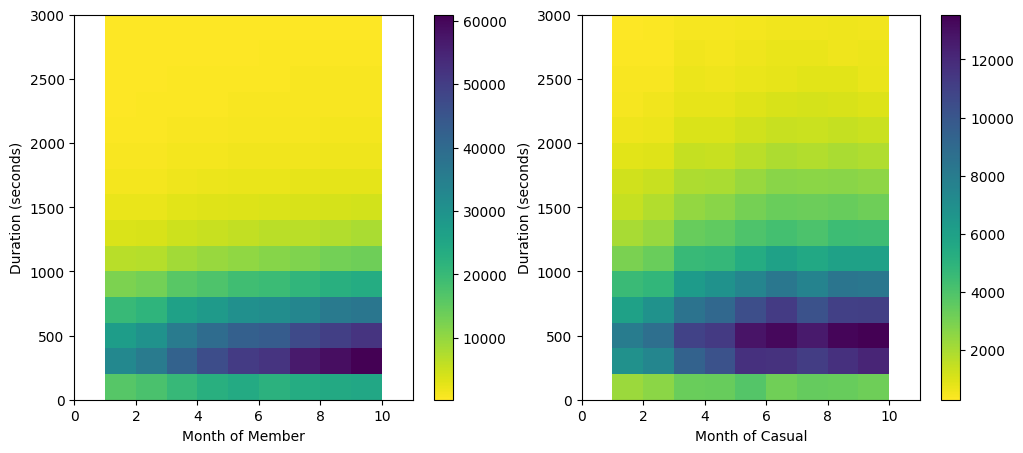

In [41]:
#Create heatmap for each casual or member user type
bike_rental_member = bike_rental[bike_rental['member_casual'] == 'member']
bike_rental_casual = bike_rental[bike_rental['member_casual'] == 'casual']

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
plt.hist2d(data=bike_rental_member, x='month', y='duration', bins=[month_bins_x, month_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Month of Member') 
plt.ylabel('Duration (seconds)')

plt.subplot(1, 2, 2)
plt.hist2d(data=bike_rental_casual, x='month', y='duration', bins=[month_bins_x, month_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Month of Casual')
plt.ylabel('Duration (seconds)')


In both member and casual users group, we can see that the number of rental bikes are increasing from January to September of 2024 and it reaches the top in September. However, members ride bikes shorter in general than casual users. 

### Duration, Bike Type and Membership

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are numeric variables and categorical variables. Numerical variables are duration (in secs), month, start_hour, end_hour while Categorical variables are member_casual, and rideable_type. Variable of interest is duration because it is highly related with rental fees. 

Month: There are extreme many members who ride bikes from July to September of 2024. Moreover, in both member and casual riders group, they do ride longer and longer from January to September.

Start Hour: There are extreme many members who ride bikes at 8 in the morning and 17 in the afternoon for about 300-500 seconds. This is true in both two groups of user type

End Hour: There are extreme many members who ride bikes at 8 in the morning and 17 in the afternoon for about 300-500 seconds

Member Casual (User type): It shows that Casual users ride longer than members.

Rideable Type: Most people rent electric bikes than classic bike.


## Multivariate Exploration

First have a look at the correlation among numerical variables

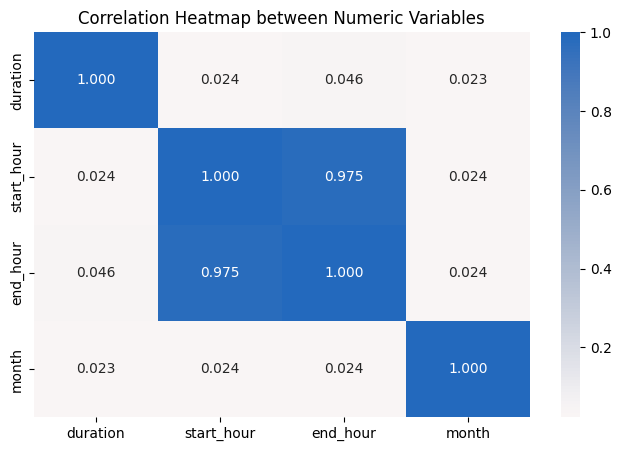

In [42]:
# Correlation heatmap plot between numeric variables
plt.figure(figsize = [8, 5])
sns.heatmap(bike_rental[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Heatmap between Numeric Variables')
plt.show()


The start hour and end hour are highly correlated as we can think, but the other numeric variables have no correlation each other. In order to see the visual relationship, drawing scatter plot is necessary

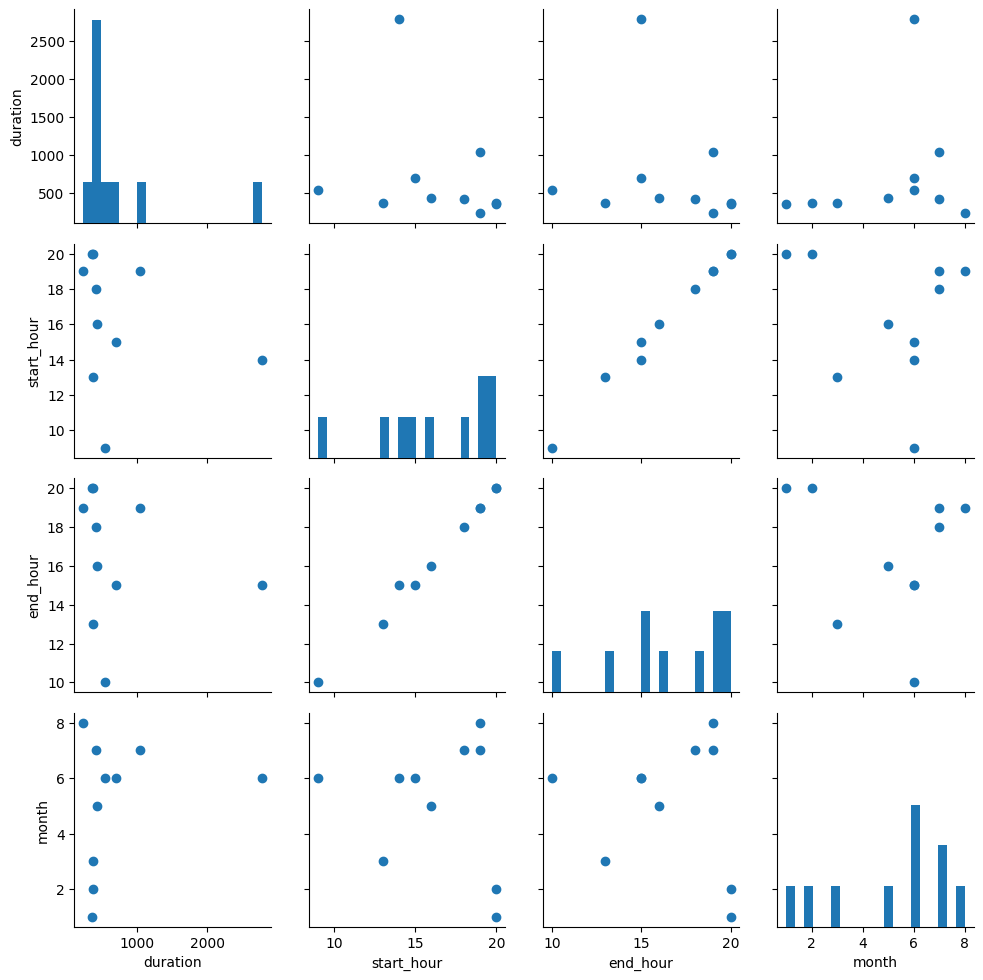

In [43]:
# Correlation scatter plot between numeric variables
sample = np.random.choice(bike_rental.shape[0], 10, replace = False)
bike_samples = bike_rental.loc[sample,:]

g = sns.PairGrid(data = bike_samples, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)

As can be seen, the start_hour and end_hour are highly correlated. 

Let's move on to looking into how duration correlate with the categorical variables


<Figure size 1000x1000 with 0 Axes>

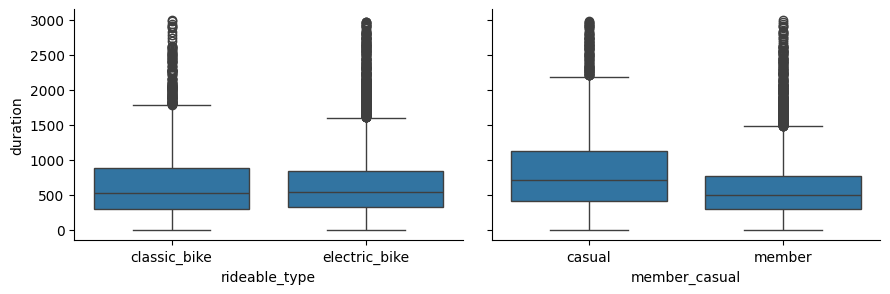

In [44]:
# Plot the matrix of numeric features against categrorical features
samples = np.random.choice(bike_rental.shape[0], 10000, replace=False)
bike_samples = bike_rental.iloc[samples, :]

def boxgrid(x, y, data=None, **kwargs):
    # Check if 'color' is already in kwargs, if not, set it to default_color
    if 'color' not in kwargs:
        default_color = sns.color_palette()[0]
        kwargs['color'] = default_color
    sns.boxplot(x=x, y=y, data=data, **kwargs)

plt.figure(figsize=[10, 10])
g = sns.PairGrid(data=bike_samples, y_vars='duration', x_vars=categoric_vars, height=3, aspect=1.5)
g.map(boxgrid);

It shows that Casual members oftern ride bikes longer than usual members. Duration in secs of electric bikes are almost the same as classic bikes but sometimes it takes longer. 

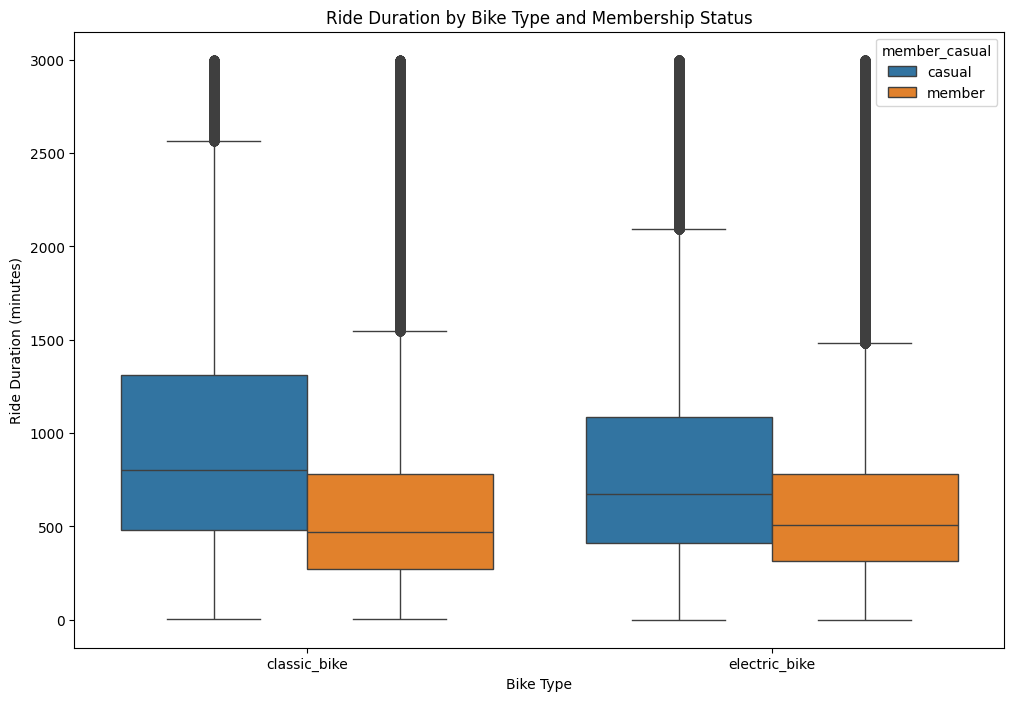

In [45]:
# Set up the figure for ride duration, bike type, and member/casual
plt.figure(figsize=(12, 8))
sns.boxplot(x='rideable_type', y='duration', hue='member_casual', data=bike_rental)
plt.title('Ride Duration by Bike Type and Membership Status')
plt.xlabel('Bike Type')
plt.ylabel('Ride Duration (minutes)')
plt.show()

In both two types of bikes, members ride shorter than casual riders but it is much higher in classic bike

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As can be seen from the charts, start hour and end_hour are highly correlated and it seems that there is almost no correlation among other features. When it comes to categorical variables, It shows that Casual members oftern ride bikes longer than usual members. Duration in secs of electric bikes are almost the same as classic bikes but sometimes it takes longer. However, members ride bikes shorter in general than casual users. It is also a case when comparing between electric bikes and classic bikes.

### Were there any interesting or surprising interactions between features?

> Casual riders prefer classic bikes and tend to have longer ride durations, especially on classic bikes, whereas members tend to take shorter, more efficient trips, especially on electric bikes.

## Conclusions
From all the above visualizations, we can see that the casual users tend to rent the bikes for longer durations compared to the members.

The electric bikes are rented for longer durations compared to the docked bikes. 

The start hour and end hour of the rentals are similar for both casual and member users.

The number of rentals is higher for casual users compared to member users.

The number of rentals is higher for electric bikes compared to docked bikes.

The number of rentals is higher for casual users compared to member users.

When looking into the heatmap of the start hour vs duration, we can see that the rentals are higher during the day time and the duration of the rentals is higher during the night time.

The number of rentals is higher from July to September compared to other months.

And we can see that the popular start and end stations are the same. For example, the top 10 start stations are also the top 10 end stations but in a different order.


In [46]:
# Export notebook as HTML or PDF 
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_I_exploration_template.ipynb', '--to', 'html'])

/Users/macbook/Documents/final-project-nano-degree/.venv/bin/python: No module named nbconvert


1